# Home Credit default risk

The objective of this competition is to predict to predict clients' repayment abilities for a loan servicer provider calleed Home Credit. More information available at the competition homepage https://www.kaggle.com/competitions/home-credit-default-risk/overview


# EDA

## Ref

https://www.kaggle.com/code/codename007/home-credit-complete-eda-feature-importance


In [1]:
# check environment
!which python

/Users/daddy2/miniconda3/envs/py311kaggle/bin/python


In [2]:
# Setup environment
!pip install --quiet -r requirements.txt

# Get data


In [4]:
%%bash
# pip install --upgrade pip
# pip install kaggle
# dir /kaggle/input
# cd /kaggle/input
cd input
# kaggle competitions download -c home-credit-default-risk
unzip home-credit-default-risk.zip -d home-credit-default-risk

bash: line 5: cd: input: No such file or directory


Archive:  home-credit-default-risk.zip
  inflating: home-credit-default-risk/HomeCredit_columns_description.csv  
  inflating: home-credit-default-risk/POS_CASH_balance.csv  
  inflating: home-credit-default-risk/application_test.csv  
  inflating: home-credit-default-risk/application_train.csv  
  inflating: home-credit-default-risk/bureau.csv  
  inflating: home-credit-default-risk/bureau_balance.csv  
  inflating: home-credit-default-risk/credit_card_balance.csv  
  inflating: home-credit-default-risk/installments_payments.csv  
  inflating: home-credit-default-risk/previous_application.csv  
  inflating: home-credit-default-risk/sample_submission.csv  


## Accelerate pandas using GPU

refers installation guide in https://docs.rapids.ai/install

conda create --solver=libmamba -n rapids-24.02 -c rapidsai -c conda-forge -c nvidia \
 rapids=24.02 python=3.10 cuda-version=12.0


In [ ]:
if 0:
    import cudf

    print("\n Using rapids with cudf syntax")
    x = cudf.DataFrame({"x": [1, 2, 3]})
    x_usage = x.memory_usage(deep=True)
    assert x_usage[0] == 24, "Not using GPU for dataframe"
    print(x_usage)


    print("\n Using rapids with pandas syntax")
    %load_ext cudf.pandas
    import pandas as pd  # package for high-performance, easy-to-use data structures and data analysis
    x = pd.DataFrame({'x': [1, 2, 3]})
    x_usage = x.memory_usage(deep=True)
    assert x_usage[0] == 24, "Not using GPU for dataframe"
    print(x_usage)

In [ ]:
import numpy as np  # fundamental package for scientific computing with Python
import matplotlib
import matplotlib.pyplot as plt  # for plotting
import seaborn as sns  # for making plots with seaborn

color = sns.color_palette()
import plotly.offline as py

py.init_notebook_mode(connected=True)
from plotly.offline import init_notebook_mode, iplot

init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.offline as offline

offline.init_notebook_mode()
# from plotly import tools
# import plotly.tools as tls
# import squarify
# from mpl_toolkits.basemap import Basemap
# from numpy import array
# from matplotlib import cm

# import cufflinks and offline mode
import cufflinks as cf

cf.go_offline()

# from sklearn import preprocessing
# # Supress unnecessary warnings so that presentation looks clean
# import warnings
# warnings.filterwarnings("ignore")

# Print all rows and columns
# pd.set_option("display.max_columns", None)
# pd.set_option('display.max_rows', None)

import os
from pathlib import Path

# Relationship among data files

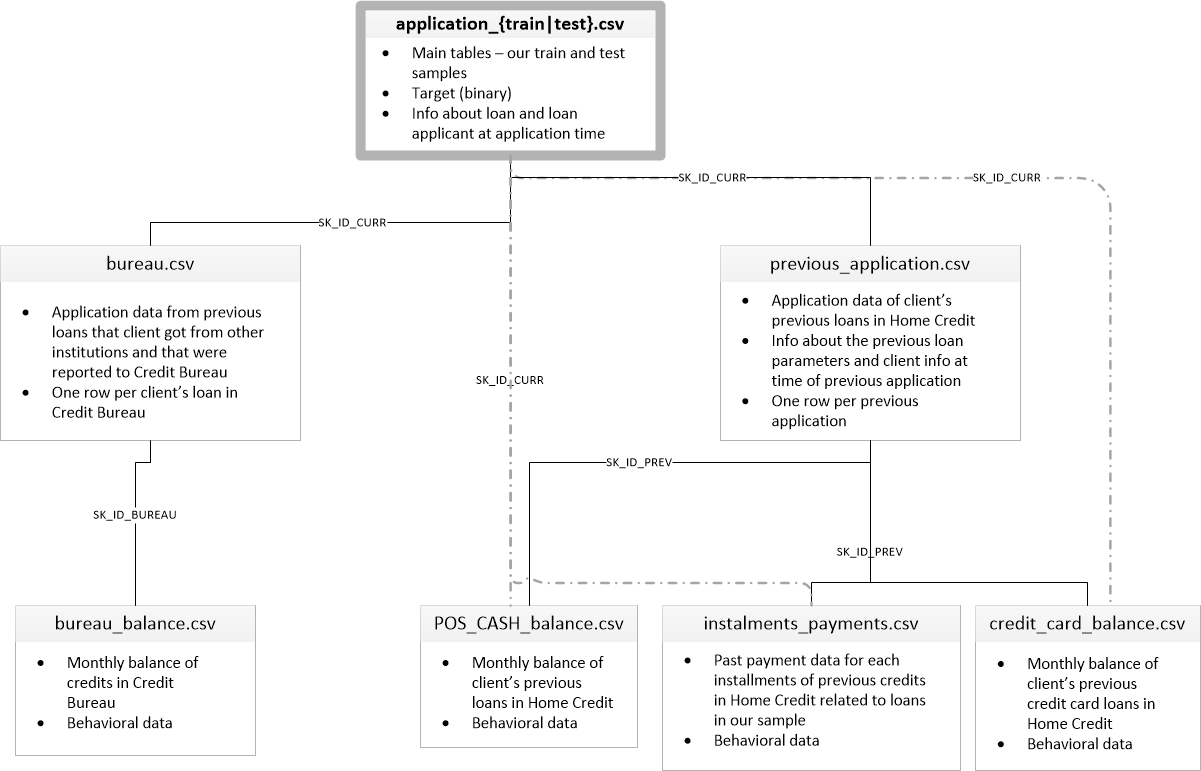
source: https://storage.googleapis.com/kaggle-media/competitions/home-credit/home_credit.png

??
are SK_ID_CURR and SK_DI_PREV unique customer applicaiton ID (or case?) for current and previous application respectively?


# Questions

1. What is the relationship between SK_ID_PREV and SK_ID_CURR
1. How to merge them?


In [ ]:
# Generate code to read csv into respective data frame name
data_dir = "/kaggle/input/home-credit-default-risk/"

if 1:
    names = os.listdir(data_dir)
    # os.path.join("fda", "dfa")
    for i, n in enumerate(names):
        p = os.path.join(data_dir, n)
        df_name = f"df_{n.split('.csv')[0]}"
        text = f"{df_name}\t= pd.read_csv('{p}')"
        print(text)
        print("print('\\n')")
        print(f"print('{i+1}/{len(names)}: {df_name} - size {df_name}.size')")
        print(f"display({df_name}.head(3))")
        print()

In [ ]:
df_credit_card_balance = pd.read_csv(
    "/kaggle/input/home-credit-default-risk/credit_card_balance.csv"
)
print("\n")
print("1/10: df_credit_card_balance - size df_credit_card_balance.size")
display(df_credit_card_balance.head(3))

df_bureau = pd.read_csv("/kaggle/input/home-credit-default-risk/bureau.csv")
print("\n")
print("2/10: df_bureau - size df_bureau.size")
display(df_bureau.head(3))

df_previous_application = pd.read_csv(
    "/kaggle/input/home-credit-default-risk/previous_application.csv"
)
print("\n")
print("3/10: df_previous_application - size df_previous_application.size")
display(df_previous_application.head(3))

df_bureau_balance = pd.read_csv(
    "/kaggle/input/home-credit-default-risk/bureau_balance.csv"
)
print("\n")
print("4/10: df_bureau_balance - size df_bureau_balance.size")
display(df_bureau_balance.head(3))


df_installments_payments = pd.read_csv(
    "/kaggle/input/home-credit-default-risk/installments_payments.csv"
)
print("\n")
print("6/10: df_installments_payments - size df_installments_payments.size")
display(df_installments_payments.head(3))

df_POS_CASH_balance = pd.read_csv(
    "/kaggle/input/home-credit-default-risk/POS_CASH_balance.csv"
)
print("\n")
print("7/10: df_POS_CASH_balance - size df_POS_CASH_balance.size")
display(df_POS_CASH_balance.head(3))

df_application_train = pd.read_csv(
    "/kaggle/input/home-credit-default-risk/application_train.csv"
)
print("\n")
print("8/10: df_application_train - size df_application_train.size")
display(df_application_train.head(3))

df_application_test = pd.read_csv(
    "/kaggle/input/home-credit-default-risk/application_test.csv"
)
print("\n")
print("9/10: df_application_test - size df_application_test.size")
display(df_application_test.head(3))

df_sample_submission = pd.read_csv(
    "/kaggle/input/home-credit-default-risk/sample_submission.csv"
)
print("\n")
print("10/10: df_sample_submission - size df_sample_submission.size")
display(df_sample_submission.head(3))

# change encoding to solve char coding error.
df_HomeCredit_columns_description = pd.read_csv(
    "/kaggle/input/home-credit-default-risk/HomeCredit_columns_description.csv",
    encoding="ISO-8859-1",
)
print("\n")
print(
    "5/10: df_HomeCredit_columns_description - size df_HomeCredit_columns_description.size"
)
display(df_HomeCredit_columns_description.head(3))

# Understanding meaning of heading in columns

## Prediction variable and unique ID for client

From sample_submission.csv,

1. _SK_ID_CURR_ is the unique ID

- 2:1,application\_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,
- 124:125,bureau.csv,SK_ID_CURR,"ID of loan in our sample - one loan in our sample can have 0,1,2 or more related previous credits in credit bureau ",hashed

1. _TARGET_ is the a predition target

- 1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample
- 0 - all other cases

According to https://www.kaggle.com/competitions/home-credit-default-risk/data, HomeCredit_columns_description.csv store description of each heading

This file contains descriptions for the columns in the various data files.


In [ ]:
!grep -rn "TARGET" '/kaggle/input/home-credit-default-risk/HomeCredit_columns_description.csv'

In [ ]:
!grep -rn "SK_ID_CURR" '/kaggle/input/home-credit-default-risk/HomeCredit_columns_description.csv'

In [ ]:
# pd.set_option("display.max_rows", None)

df = df_HomeCredit_columns_description

cols = ["Row", "Description", "Special"]
df_tmp = df[df["Table"] == "application_{train|test}.csv"]
display(df_tmp[cols].sort_values(by=["Row"]))

# Missing values

## Data from application_train.csv

The initial missingno plot show about 30% of the columns have more than 70% of missing values. We check with columns has the missing values.


In [ ]:
## Inspection on the main application csv
# import missingno

# df = df_application_train
# missingno.matrix(df_application_train)

<!-- 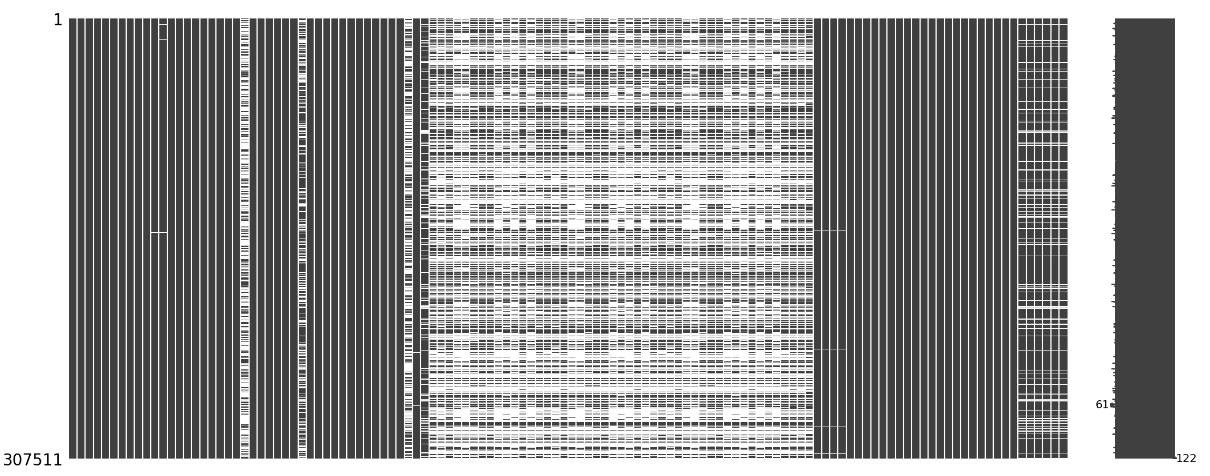 -->


In [ ]:
df = df_application_train

# Percent of missing values


In [ ]:
col_with_missing = [c for c in list(df.columns) if df[c].isnull().any()]
print(f"Number of columns with missing values: {len(col_with_missing)}")
# sorted(col_with_missing[:10])

## Explore target variable

There is no missng value in the target variable.


In [ ]:
# Check subset for testing

from sklearn.model_selection import train_test_split

seed = 11

train_set_ratio = 0.9

y = df["TARGET"]
features = list(df.columns)
features.remove("TARGET")

X_train, X_test, y_train, y_test = train_test_split(
    df[features], y, test_size=1 - train_set_ratio, random_state=seed
)

for n in [X_train, X_test, y_train, y_test]:
    print("len ", len(n))

import missingno

df = pd.concat([X_test, y_test], axis=1)
display(df.head())

fig = missingno.matrix(df)
fig_copy = fig.get_figure()
fig_copy.savefig("missingno1.png", bbox_inches="tight")

In [ ]:
if df["TARGET"].isnull().any():
    print("Target variable has null value.")
else:
    print("Target variable does not have null value.")

series_ = df["TARGET"].value_counts()
print("series_ \n", series_)
df_tmp = pd.DataFrame({"Labels": series_.index, "Values": series_.values})
display(df_tmp)

if 1:
    # df_tmp.plot(
    #     kind="pie",
    # )
    # df_tmp.iplot(kind="pie", labels="labels", values="Values", title="Loan repayed or not")

    # temp = application_train["TARGET"].value_counts()
    # df = pd.DataFrame({'labels': temp.index,
    #                 'values': temp.values
    #                 })

    df_tmp.plot.pie(
        y="Labels",
        # kind="pie",
        # labels="labels", values="values", title="Loan Repayed or not"
    )

![alt text](missingno1.png)


# Data exploration

## Exploration using subset of dataset

Most of the client does not have payment difficulties (mean for TARGET is 0.077)


In [ ]:
isnull_percent = df[col_with_missing].isnull().sum() / len(df)
isnull_percent = isnull_percent.sort_values(ascending=False)
print("Feature \t\t Percentage of missing values")
display(isnull_percent)
# missingno.matrix(df[list(isnull_percent.index)])
# isnull_percent[:20].plot(kind="barh", title="Feature with missing values")

In [ ]:
pd.concat([y_train, y_test]).isnull().any()